In [74]:
import os
import math
import obspy
import pickle
import datetime
import scipy
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd
from multiprocessing import Pool
import random

from cmcrameri import cm
import matplotlib as mpl

In [2]:
list_tpmax = []
list_mags = []
list_mag_types = []
list_eq = []
eqs = {}
count = 0

In [3]:
#parameters = [[1,0.1,19,0,'eq_object_1s_bandpass_01_19_snr_20_blank_0'],
#[1,0.1,19,0.05,'eq_object_1s_bandpass_01_19_snr_20_blank_005'],
#[1,0.1,19,0.1,'eq_object_1s_bandpass_01_19_snr_20_blank_01'],
#[1,0.1,19,0.25,'eq_object_1s_bandpass_01_19_snr_20_blank_025'],
#[1,0.1,19,0.5,'eq_object_1s_bandpass_01_19_snr_20_blank_05'],
#[4,0.1,19,0,'eq_object_4s_bandpass_01_19_snr_20_blank_0'],
#[4,0.1,19,0.05,'eq_object_4s_bandpass_01_19_snr_20_blank_005'],
#[4,0.1,19,0.1,'eq_object_4s_bandpass_01_19_snr_20_blank_01'],
#[4,0.1,19,0.25,'eq_object_4s_bandpass_01_19_snr_20_blank_025'],
#[4,0.1,19,0.5,'eq_object_4s_bandpass_01_19_snr_20_blank_05'],
#[2,0.1,19,0.5,'eq_object_2s_bandpass_01_19_snr_20'],
#[3,0.1,19,0.5,'eq_object_3s_bandpass_01_19_snr_20']]
parameters = [[0.5,0.1,19,0,'eq_object_05s_bandpass_01_19_snr_20_blank_0'],
[0.5,0.1,19,0.05,'eq_object_05s_bandpass_01_19_snr_20_blank_005'],
[0.5,0.1,19,0.1,'eq_object_05s_bandpass_01_19_snr_20_blank_01'],
[0.5,0.1,19,0.25,'eq_object_05s_bandpass_01_19_snr_20_blank_025']]


NameError: name 'eq' is not defined

In [89]:
def gen_bs_data(x,y):
    x_bs = []
    y_bs = []
    for _ in range(0, len(x)):
        n = random.randint(0, len(x)-1)
        x_bs.append(x[n])
        y_bs.append(y[n])
    return x_bs, y_bs

def get_average(list_data):
    if len(list_data)>=0:
        mean_tp = np.mean(list_data) 
        std_tp = np.std(list_data) 
        y_tp = [] 
        for j in list_data: 
            if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:
                y_tp.append(math.log(j, 10))
            elif len(list_data)==1:
                y_tp.append(math.log(j, 10))
        if math.isnan(np.median(y_tp))==False:  
            tp_ave = (np.median(y_tp))
            return tp_ave
    else:
        return None


def load_and_plot(p):
    fn = p[-1]
    print(fn)
    list_tpmax = []
    list_tcmax = []
    list_mags = []
    list_mag_types = []
    list_iv2 = []
    folders = os.listdir('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/')
    for eq_no in range(0, len(folders)):
        if os.path.exists('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'+folders[eq_no]+'/'+fn+'.pkl'):
            with open('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'+folders[eq_no]+'/'+fn+'.pkl', 'rb') as picklefile:
                eq = pickle.load(picklefile)
            try:
                if eq.calculated_params['tau_p_max'] != [] and eq.calculated_params['tau_c'] != []:
                    tp_ave = get_average(eq.calculated_params['tau_p_max'])
                    tc_ave = get_average(eq.calculated_params['tau_c'])
                    if tp_ave != None and tc_ave != None:
                        list_tpmax.append(tp_ave)
                        list_tcmax.append(tc_ave)
                        list_iv2.append(eq.calculated_params['iv2'])
                        list_mags.append(eq.event_stats['eq_mag'])
                        list_mag_types.append(eq.event_stats['eq_mag_type'])
            except:
                continue
    #folders = os.listdir('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/')
    #for eq_no in range(0, len(folders)):
    #    if os.path.exists('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+folders[eq_no]+'/'+fn+'.pkl'):
    #        with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+folders[eq_no]+'/'+fn+'.pkl', 'rb') as picklefile:
    #            eq = pickle.load(picklefile)
    #        list_tpmax.append(eq.calculated_params['tau_p_max'])
    #        list_tcmax.append(eq.calculated_params['tau_c'])
    #        list_mags.append(eq.event_stats['eq_mag'])
    #        list_mag_types.append(eq.event_stats['eq_mag_type'])
            
    #x, y = plot_for_params(list_mags, list_tpmax, p[-1])

    return list_tpmax, list_tcmax, list_iv2, list_mags, list_mag_types


In [86]:
parameters = [[1,0.1,19,0.25,'eq_object_1s_bandpass_01_19_snr_20_blank_025']]

In [90]:

#for p in parameters[1]:
p = parameters[0]
list_tpmax, list_tcmax, list_iv2, list_mags, list_mag_types = load_and_plot(p)
#with Pool(5) as pool:

eq_object_1s_bandpass_01_19_snr_20_blank_025


In [62]:
tp_a = 0.21
tp_b = -0.32
tc_a = 0.17
tc_b = -0.01

In [91]:
list_iv2

[[[2.786415209662904e-07, 85.48774528463134],
  [7.724709146572684e-08, 126.67970630866552],
  [1.2422885927373697e-07, 88.9066638463614],
  [2.507385015164707e-08, 139.10325379149046],
  [1.0395833909613568e-07, 20.972878892512615],
  [5.765520331731362e-07, 86.34509442116567],
  [2.221398145378077e-07, 25.40673429014357],
  [2.675570817292052e-07, 24.33836807717399],
  [2.61236573012839e-08, 137.15660790038547],
  [8.62405834565001e-07, 120.92045818078026],
  [1.111373529769323e-06, 113.46331927499723]],
 [[5.252757177263756e-08, 163.86542950009343],
  [1.3953065852842268e-06, 99.40552238970442],
  [1.83578205463801e-07, 57.181794524918395]],
 [[4.932152531288667e-07, 86.26246273966656],
  [2.550224831500269e-07, 88.22458435719582]],
 [[7.454738515258514e-14, 123.3350109336356]],
 [[6.786021665541342e-08, 137.65533672310832],
  [8.747923556346478e-08, 139.46725269037142]],
 [[2.8234350665237075e-10, 160.79815802427638],
  [2.791948078501176e-08, 120.42549061141534]],
 [[3.20193001927

In [63]:
list_tpmax = np.array(list_tpmax)
list_tcmax = np.array(list_tcmax)
list_mags = np.array(list_mags)

In [67]:
int((max(list_mags)-3)*10)

41.0

In [81]:
len(list_tpmax)

422

Text(0.5, 0, 'tp distance')

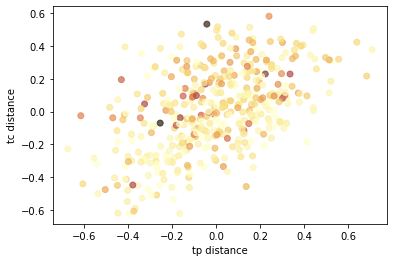

In [80]:
cmap = cm.lajolla # define the colormap
# extract all colors from the .oslo map
cmaplist = [cmap(i) for i in range(0,cmap.N,int((max(list_mags)-3)*10))]

# create the new map
new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 200, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.scatter(list_tpmax-(tp_a*(list_mags-5)+tp_b), list_tcmax-(tc_a*(list_mags-5)+tc_b), c = (list_mags - 3)/max(list_mags-3), cmap=new_cmap, alpha = 0.7)
plt.ylabel('tc distance')
plt.xlabel('tp distance')

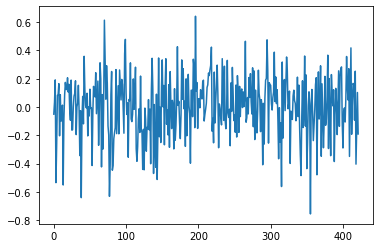

In [59]:
plt.plot(list_tpmax-(tp_a*(list_mags-5)+tp_b))

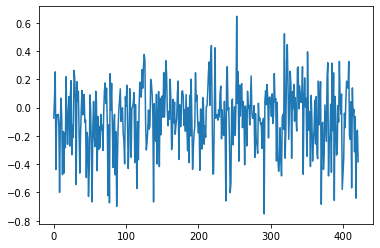

In [58]:
plt.plot(list_tcmax-(tc_a*(list_mags-5)+tc_b))

In [34]:
list_data = [1,2,3,4,1,2,3]

In [35]:
    if len(list_data)>=0:
        mean_tp = np.mean(list_data) 
        std_tp = np.std(list_data) 
        y_tp = [] 
        for j in list_data: 
            if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:
                y_tp.append(math.log(j, 10))
            elif len(list_data)==1:
                y_tp.append(math.log(j, 10))
        if math.isnan(np.median(y_tp))==False:  
            tp_ave = (np.median(y_tp))
            
            

In [36]:
j

3

In [37]:
tp_ave

0.30102999566398114